# Jarvis march algorithm

## Basic Jarvis march algorithm implementation

In [84]:
def find_left_most_point(inputSet):
    target_point = inputSet[0]

    for i in range(1,len(inputSet)):

        if inputSet[i][0] < target_point[0]:
            target_point = inputSet[i]

        elif inputSet[i][0] == target_point[0] and inputSet[i][1] < target_point[1]:
            target_point = inputSet[i]

    return target_point

def crossProduct(p1,p2,p3):

    y1 = p1[1] - p2[1]
    y2 = p1[1] - p3[1]
    x1 = p1[0] - p2[0]
    x2 = p1[0] - p3[0]

    return y2 * x1 - y1 * x2

def distance(p1,p2):

    return (p2[0]-p1[0])**2 + (p2[1]-p1[1])**2

def jarvismarch(inputSet):
    start = find_left_most_point(inputSet)
    current = start
    outputSet = [start]

    while True:
        next = inputSet[0]

        for i in range(1, len(inputSet)):
            if inputSet[i] == current:
                continue

            res = crossProduct(current, next, inputSet[i])
            if res < 0:
                next = inputSet[i]
            elif res == 0:
                #if the next two two pints are both on the hull, keep the farer one
                if distance(current, next) < distance(current, inputSet[i]):
                    next = inputSet[i]
                else:
                    continue
        #stop if back to the start point
        if next == start:
            break

        outputSet.append(next)
        current = next
    return outputSet

## data points generation

In [85]:
from random import *

MAXX = 32767
MAXY = 32767
MINX = 0
MINY = 0
MIDDLE = [(MAXX-MINX)/2, (MAXY-MINY)/2]
NS = [100, 500, 1000, 5000, 10000, 15000, 20000]

def generate_random(N):
    points = []
    for p in range(N):
        while True:
            x = randint(MINX, MAXX)
            y = randint(MINY, MAXY)
            point = [x,y]
            if point not in points:
                break
        points.append(point)
        
    return points

def generate_worst(N):
    angle = 0
    radius = 16383.5
    points = []
    for p in range(N + 100):
        x = ceil(MIDDLE[0] + (radius * cos(angle)))
        y = ceil(MIDDLE[1] + (radius * sin(angle)))
        point = [x,y]
        points.append(point)
        angle += (2*pi)/N
    return points 

inputSets_random = [generate_random(NS[n]) for n in range(7)]
inputSets_worst = [generate_worst(NS[n]) for n in range(7)]

## Timer function

In [98]:
import timeit

def timer_random():
    times = []
    stmt_code = "[jarvismarch(inputSets_random[n]) for n in range(7)]"
    setup_code = '''
from __main__ import jarvismarch
from __main__ import inputSets_random
    '''
    
    for n in range(7):
        time = timeit.timeit(lambda: jarvismarch(inputSets_random[n]),setup = setup_code, number = 5)
        times.append(time/5)
    return times

def timer_worst():
    times = []
    stmt_code = "[jarvismarch(inputSets_worst[n]) for n in range(7)]"
    setup_code = '''
from __main__ import jarvismarch
from __main__ import inputSets_worst
    '''
    
    for n in range(7):
        time = timeit.timeit(lambda: jarvismarch(inputSets_worst[n]),setup = setup_code, number = 5)
        times.append(time/5)
    return times

## Plot function

In [99]:
import matplotlib.pyplot as plt

def plot(times):
    NS = [100,500,1000,5000,10000,15000,20000]
    fig = plt.figure()
    graph = fig.add_subplot(111)
    graph.set(title='analysis graph', ylabel='Time', xlabel='Number of points')
    graph.plot(NS,times)
    plt.show()

## Test code for random case

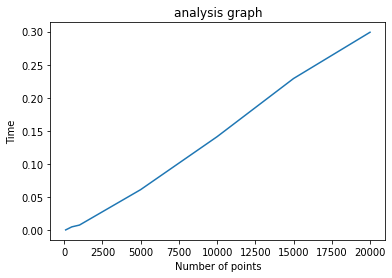

In [100]:
#generate random datatSet 
inputSets_random = [generate_random(NS[n]) for n in range(7)]

#plot of the previously computed execution times
times = timer_random()
plot(times)


## Test code for worst case

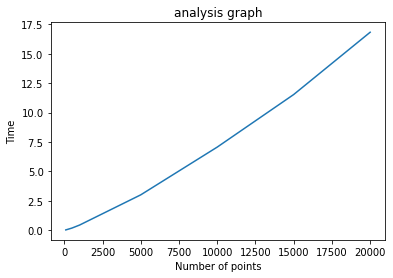

In [91]:
#generate worst-case datatSet 
inputSets_worst = [generate_worst(NS[n]) for n in range(7)]

#plot of the previously computed execution times
times = timer_worst()
plot(times)


*Optional*: Feel free to use the code below on small datasets (e.g., N = 10) to visually inspect whether the algorithm has been implemented correctly. The fragment below assumes both `inputSet` and `outputSet` to be lists of 2D points, with each point being a list of 2 elements (e.g., `[[x1,y1], [x2,y2], ..., [x_k,y_k]]`)

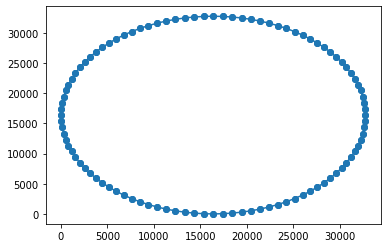

In [90]:
import matplotlib.pyplot as plt

# inputSet and outputSet should have been defined above. 
# uncomment the next two lines only if you wish to test the plotting code before coding your algorithm

#inputSet = [[1,1], [2,2] , [3, 3], [4,4], [1,4], [3,1], [1, 5], [2, 4], [3, 5]]
#outputSet = [[1,1], [3,1] , [4, 4], [3,5], [1,5]]

plt.figure()

#first do a scatter plot of the inputSet
input_xs, input_ys = zip(*inputSet)
plt.scatter(input_xs, input_ys)

#then do a polygon plot of the computed covex hull
outputSet.append(outputSet[0]) #first create a 'closed loop' by adding the first point at the end of the list
output_xs, output_ys = zip(*outputSet) 
plt.plot(output_xs, output_ys) 

plt.show() 